# Project: Insurance Fraud Detection (DS)
---------------------------------------------

*This dataset comes from the 2023 NESS Statathon (Theme 1).
* https://www.kaggle.com/competitions/2023-travelers-ness-statathon/overview

# Dataset Description
All first-party physical damage claims will be filtered by claim handlers and some of them will be referred to the fraud detection team. Your data is a sample of these referred claims from 2015 to 2016.

As a simplification, you are just going to work with the train dataset (linked below). This is because it has the answers! All teams will use the same random_seed to split the data into train and test - Dave will do this part for you. You may not delete rows in the test partition, use `transform()` to update rows in test partition, you can do almost anything you want on the train partition. If there is data leakage, you automatically go into last place (more on that later.)

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

In [ ]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 193MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


In [ ]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

fraud
0    16062
1     2938
Name: count, dtype: int64

In [ ]:
# split the data (don't change this!)

X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 23) (15200,)
(3800, 23) (3800,)


In [ ]:
X_train.head(10)

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
6787,46,F,1.0,50,38294,1,0,Rent,20116,6/6/2015,...,0.0,34,Broker,1,6420.369419,5.0,Large,12421.420480,gray,15723.35207
6097,35,M,1.0,77,35552,0,0,Own,50021,1/22/2016,...,0.0,32,Phone,1,3338.619246,1.0,Medium,22673.455310,red,15473.53232
11219,63,M,1.0,86,41432,0,1,Own,15003,2/2/2015,...,0.0,50,Phone,0,2784.762551,3.0,Compact,9208.723797,blue,25495.82584
2512,47,M,1.0,81,38502,1,0,Rent,15009,6/28/2015,...,1.0,50,Broker,0,4481.845804,4.0,Large,28051.151580,gray,35830.51049
4279,37,M,1.0,82,36102,0,0,Rent,20116,8/24/2016,...,1.0,76,Broker,1,4782.534213,8.0,Compact,38076.954140,white,41352.84911
12009,31,F,0.0,86,34315,1,0,Own,20132,2/1/2015,...,1.0,92,Phone,1,3120.283535,8.0,Medium,9216.666310,white,22787.22526
11550,61,M,1.0,90,41084,1,1,Rent,15035,12/13/2016,...,1.0,99,Online,0,5417.928861,2.0,Compact,16678.753040,gray,32570.95256
2081,32,F,1.0,92,34652,1,0,Own,50054,5/15/2015,...,0.0,72,Broker,1,8549.802364,8.0,Compact,17903.832960,blue,47490.88004
11799,25,F,1.0,48,32173,1,0,Rent,15037,1/29/2016,...,0.0,47,Broker,1,6362.939526,6.0,Compact,38486.513590,other,38485.78734
1959,41,M,1.0,75,37135,0,1,Own,20102,3/17/2015,...,0.0,3,Online,0,9082.827058,3.0,Medium,23033.522920,gray,16044.53873


# 01. Importing Modules ¶

In [ ]:
# Module to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing modules that we need for EDA, data cleaning and feature engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data for min/max scaling
from sklearn.preprocessing import  MinMaxScaler
`12
# Importing the SMOTE module
from imblearn.over_sampling import SMOTE

# Importing the modules to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Setting display option to show all columns
pd.set_option('display.max_columns', None)

# 02. EDA & Feature Engineering

In [ ]:
# Reading the raw data
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

df = pd.read_csv('train_2023.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 197MB/s]


,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,1/2/2016,Saturday,Local,0,0.0,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,12/28/2015,Monday,Parking Lot,0,0.0,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,2/26/2016,Friday,Local,0,1.0,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,9/20/2015,Sunday,Local,0,1.0,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,4/14/2015,Tuesday,Highway,0,0.0,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


#### Data Cleaning

In [ ]:
# Understanding the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             19000 non-null  int64  
 1   age_of_driver            19000 non-null  int64  
 2   gender                   19000 non-null  object 
 3   marital_status           18996 non-null  float64
 4   safty_rating             19000 non-null  int64  
 5   annual_income            19000 non-null  int64  
 6   high_education_ind       19000 non-null  int64  
 7   address_change_ind       19000 non-null  int64  
 8   living_status            19000 non-null  object 
 9   zip_code                 19000 non-null  int64  
 10  claim_date               19000 non-null  object 
 11  claim_day_of_week        19000 non-null  object 
 12  accident_site            19000 non-null  object 
 13  past_num_of_claims       19000 non-null  int64  
 14  witness_present_ind   

* Except claim_date, the data types for all columns are appropriate and do not require any changes.

In [ ]:
# Updating the datatype of claim_date to datetime
df['claim_date'] = pd.to_datetime(df['claim_date'])

In [ ]:
# Checking for NA values
print("Number of rows in the df dataset:", df.shape[0])

print("Number of NA values by column:")
df.isna().sum()

Number of rows in the df dataset: 19000
Number of NA values by column:


claim_number                 0
age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        143
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            23
age_of_vehicle               7
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

* The columns marital_status (4), witness_present_ind (143), claim_est_payout (23), and age_of_vehicle (7) contain NA values.
* Given that the number of NA values is relatively low compared to the total dataset size of 19,000 rows, we will drop these rows instead of performing imputation.

In [ ]:
#Dropping NA values
df.dropna(inplace=True)

# Shape of the updated dataset
print("Shape of the dataset after dropping NA:", df.shape)

df.head()

Shape of the dataset after dropping NA: (18823, 25)


,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,2016-01-02,Saturday,Local,0,0.0,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,2015-12-28,Monday,Parking Lot,0,0.0,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,2016-02-26,Friday,Local,0,1.0,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,2015-09-20,Sunday,Local,0,1.0,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,2015-04-14,Tuesday,Highway,0,0.0,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


#### Feature Engineering

In [ ]:
# Integer and Float columns
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,claim_date,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000
mean,9502.921213,43.593954,0.716517,73.599692,37342.821707,0.697020,0.573660,50031.015779,2015-12-30 18:01:49.015566080,0.499442,0.236785,49.443128,0.599851,4996.676545,4.996866,23040.955221,22989.127481,0.154917
min,0.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000
25%,4754.500000,35.000000,0.000000,65.000000,35551.000000,0.000000,0.000000,20112.000000,2015-06-30 00:00:00,0.000000,0.000000,17.000000,0.000000,3361.536538,3.000000,14237.383975,14111.596780,0.000000
50%,9507.000000,43.000000,1.000000,76.000000,37608.000000,1.000000,1.000000,50028.000000,2016-01-01 00:00:00,0.000000,0.000000,50.000000,1.000000,4669.858508,5.000000,20875.340220,20786.212230,0.000000
75%,14253.500000,51.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,80040.000000,2016-07-01 00:00:00,1.000000,0.000000,81.000000,1.000000,6274.833258,6.000000,29455.364010,29390.187800,0.000000
max,18999.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,2016-12-31 00:00:00,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000
std,5484.541385,12.044439,0.450701,15.359370,2959.481999,0.459559,0.494558,29174.849904,NaN,0.949242,0.425120,33.661322,0.489941,2235.448201,2.247028,11995.122975,12108.290095,0.361835


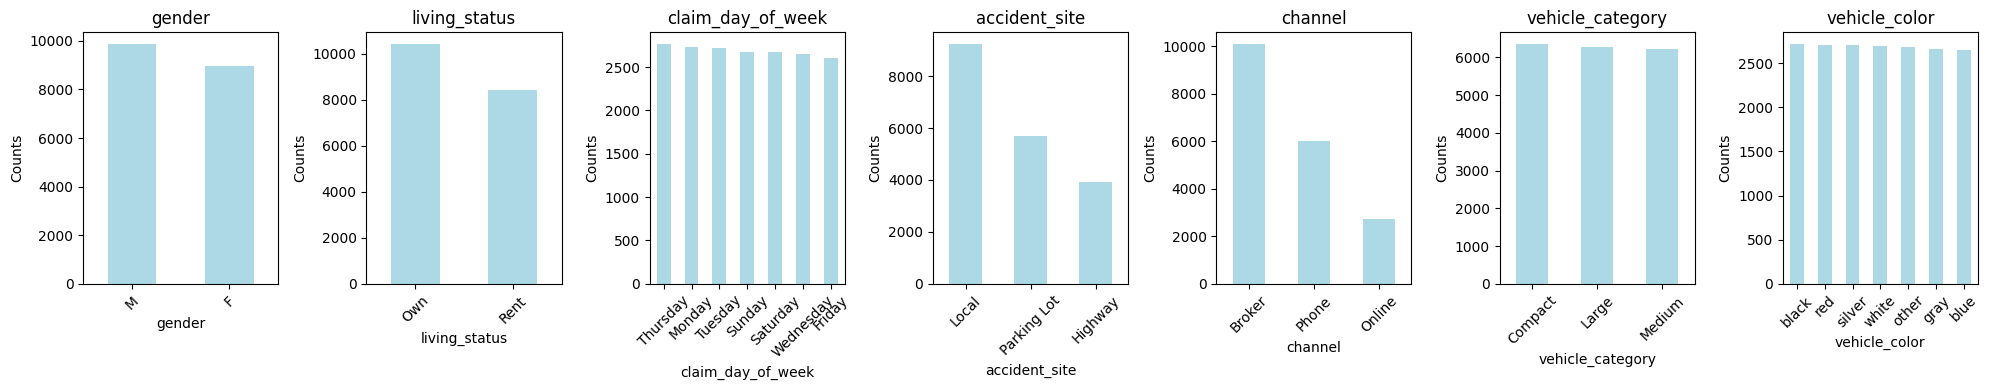

In [ ]:
# String data type columns
str_columns = ['gender', 'living_status',  'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']

def plot_value_counts(df, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 4))

    for ax, column in zip(axes, columns):
        df[column].value_counts().plot(kind='bar', ax=ax, color = 'lightblue')
        ax.set_title(f'{column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Counts')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Plot value counts for specified columns
plot_value_counts(df, str_columns)

* There are approximately 7 columns containing categorical values that need to be converted to numerical values using dummy variables.
* Additionally, in the feature engineering section, we will transform the `claim_day_of_week` column into a binary variable, indicating whether the claim was made on a weekday or not.

In [ ]:
# Extracting the month and year of the claim
df['claim_month'] = df['claim_date'].dt.month
df['claim_year'] = df['claim_date'].dt.year

# 1/0 Flag to indicate if the given claim is on weekend
df['claim_on_weekend'] = df['claim_day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Dropping the df['claim_day_of_week'] column
df = df.drop(['claim_day_of_week', 'claim_date'],axis=1)

# Claims frequency - This is designed to provide a normalized measure of the frequency of claims a driver has made, adjusted by their age.
df['claims_frequency'] = df['past_num_of_claims'] / (df['age_of_driver'] - 18)

Next, we will update the categorical  columns to numerical values (by Creating dummy variables)

In [ ]:
# List of columns with dtype string
str_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()

df_dummies = pd.get_dummies(df, columns=str_cols, drop_first=True)

# Converting boolean columns to integers (0 and 1)
bool_cols = df_dummies.select_dtypes(include=['bool']).columns
df_dummies[bool_cols] = df_dummies[bool_cols].astype(int)

df_dummies.dropna(inplace = True)
df_dummies.head()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,claim_month,claim_year,claim_on_weekend,claims_frequency,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white
0,0,50,1.0,66,39117,1,0,50051,0,0.0,18,0,5464.903723,3.0,16786.28845,34183.436390,0,1,2016,1,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,1,47,1.0,78,38498,1,0,50012,0,0.0,81,0,5448.155974,4.0,20793.29881,14528.379730,0,12,2015,0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,2,28,0.0,76,33343,0,1,20158,0,1.0,94,1,1858.971699,4.0,6729.47649,7182.832636,0,2,2016,0,0.0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
3,3,36,1.0,56,35832,1,0,50054,0,1.0,95,0,4040.932844,5.0,24914.26785,47891.788790,0,9,2015,1,0.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
4,4,60,1.0,79,40948,1,1,80010,0,0.0,53,1,4876.606138,6.0,17392.41997,7546.494014,0,4,2015,0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


#### Descriptive Analysis for better "feature" selection

Correlation Analysis

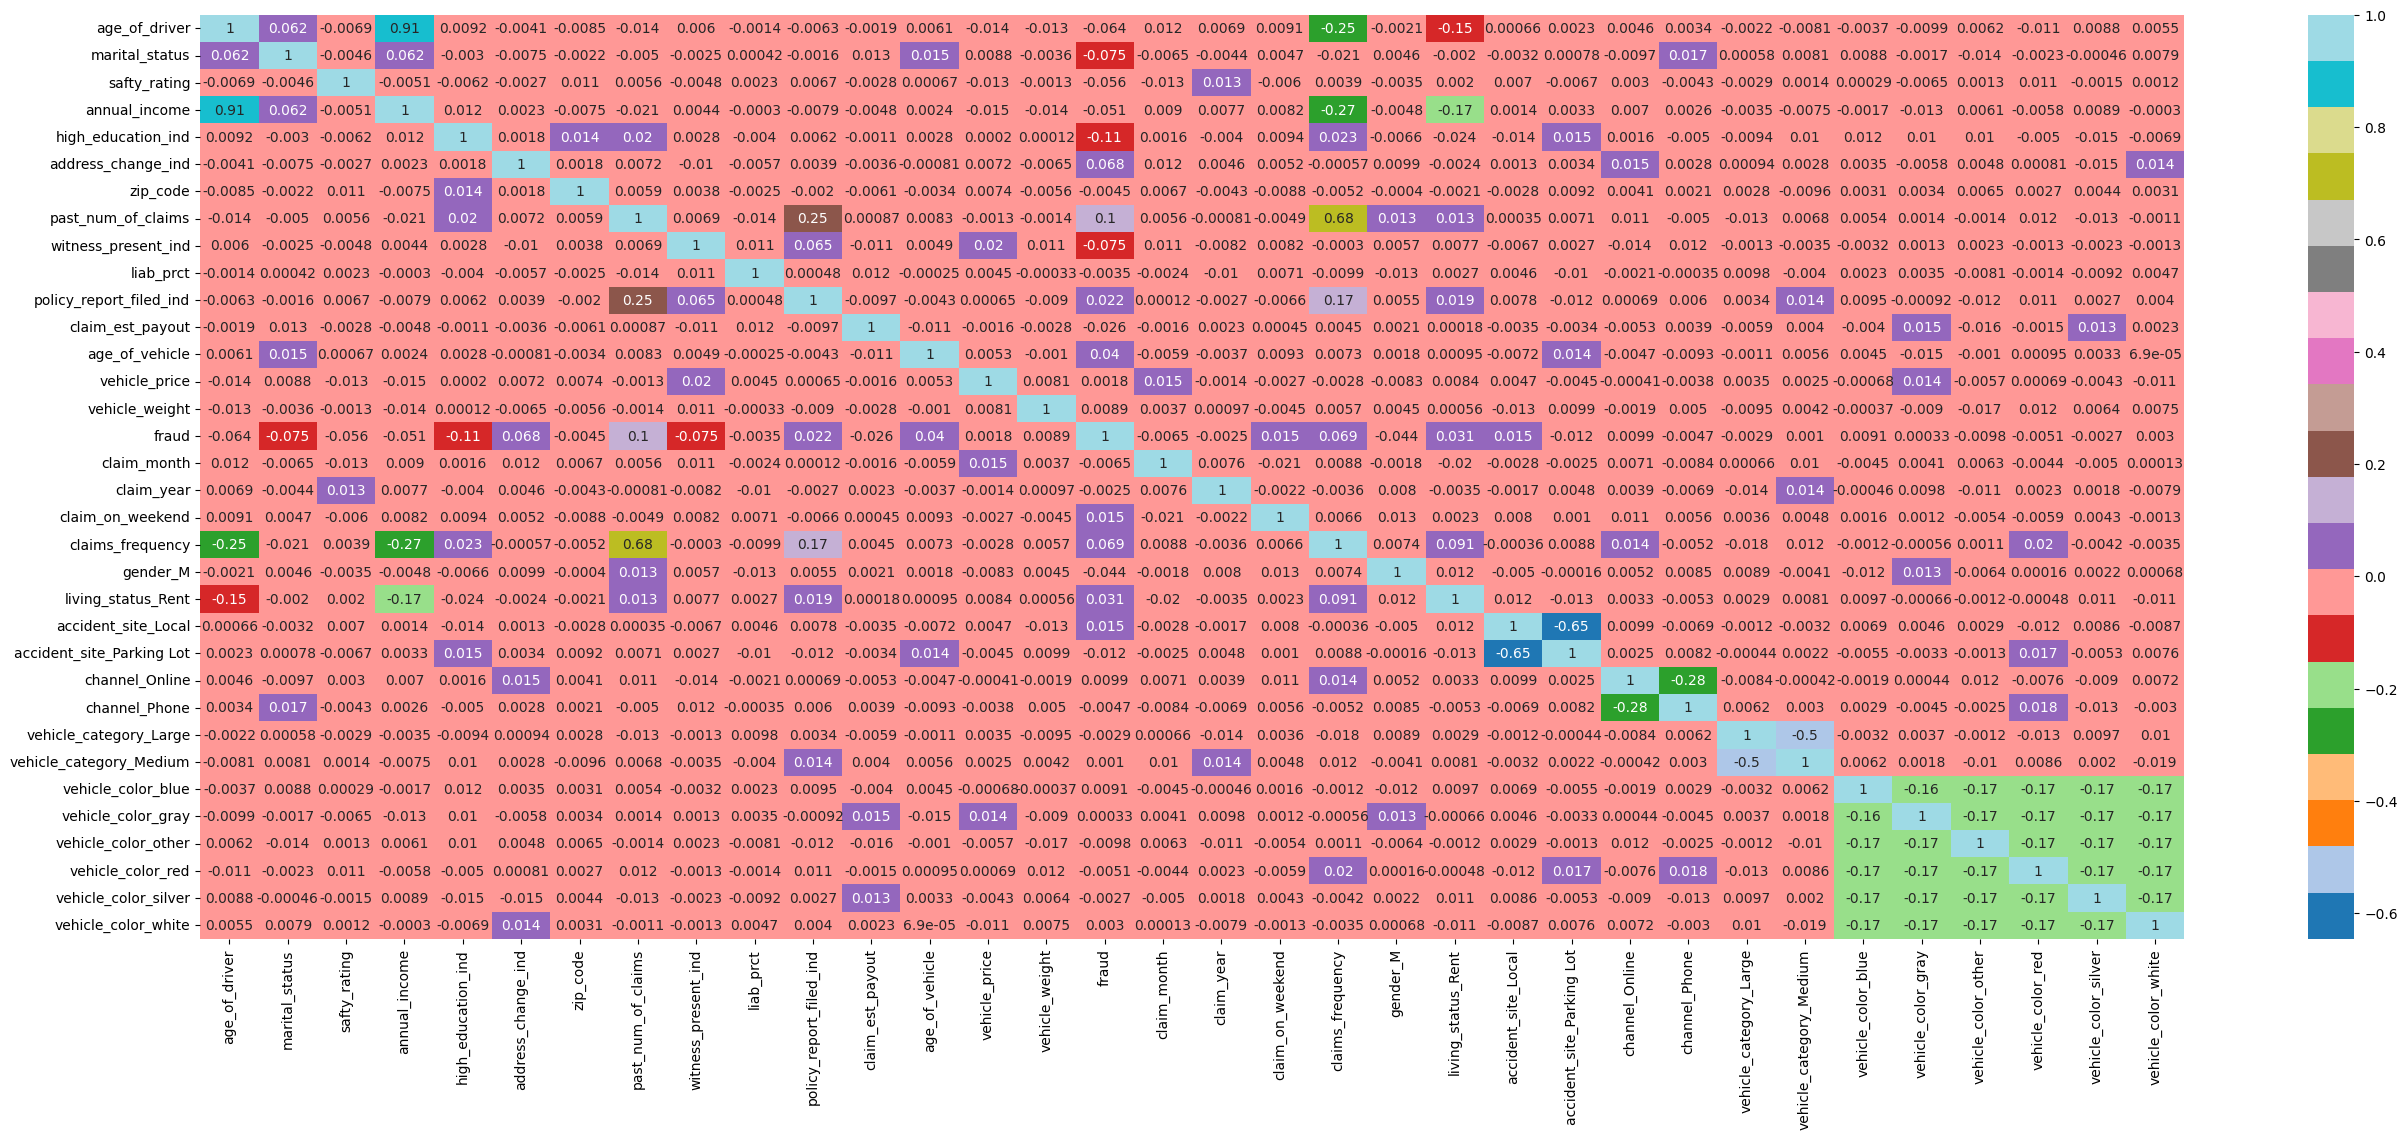

In [ ]:
# Plotting Correlation between X and Y variables
corr = df_dummies.drop(['claim_number'], axis=1).corr()

# Set the size of the figure
plt.figure(figsize=(32, 12))

# Create a heatmap with a custom color palette
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='tab20', annot=True)

# Display the heatmap
plt.show()

* No single feature perfectly predicts fraud (as indicated by the moderate correlation values), but combining these features in a predictive model could improve its performance.
* Given that "Fraud" is binary, correlations provide a measure of linear association but not causation.
* Variables with highest correlation: marital_status, high_education_ind, address_change_ind, past_num_of_claims, witness_present_ind, policy_report_field_ind, age_of_vehicle, claim_on_weekend, claim_frequency, living_status_Rent, accident_site_Local

Box Plot Distribution by Fraud Value (1 and 0)

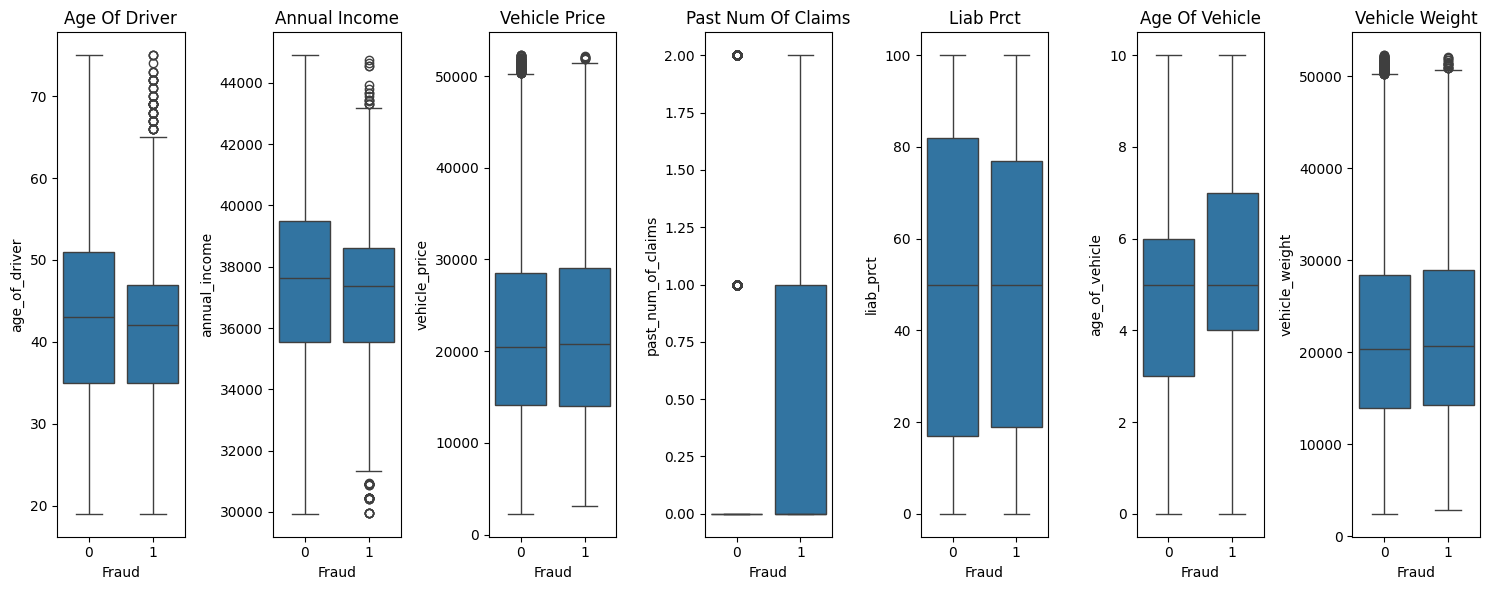

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, we define a function to calculate the Interquartile Range (IQR) and remove outliers for each y variable
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of x variables
x_variables = ['age_of_driver', 'annual_income', 'vehicle_price', 'past_num_of_claims', 'liab_prct', 'age_of_vehicle', 'vehicle_weight']

# Creating subplot for each feature variable
fig, axes = plt.subplots(nrows=1, ncols=len(x_variables), figsize=(15, 6))

# Creating a box plots for each y variable in the same axis
for ax, x_var in zip(axes, x_variables):
    df_no_outliers = remove_outliers(df_dummies, x_var)
    sns.boxplot(x='fraud', y=x_var, data=df_no_outliers, ax=ax)
    ax.set_xlabel('Fraud')
    ax.set_title(f'{x_var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()


**Key Observations**

* Strong Indicators: Past Number of Claims seem to be stronger indicators of fraud. A higher number of past claims is associated with fraudulent claims.
* Moderate Indicators: Age of Driver and Annual Income show some differences between fraudulent and non-fraudulent claims but are less pronounced.
* Weak Indicators: Vehicle Price, Age of Vehicle, and Vehicle Weight show little to no difference between fraudulent and non-fraudulent claims.

These observations can help us guide further analysis and feature selection in building a predictive model for fraud detection.

Monthly Trend - # Claims by Fraud Status

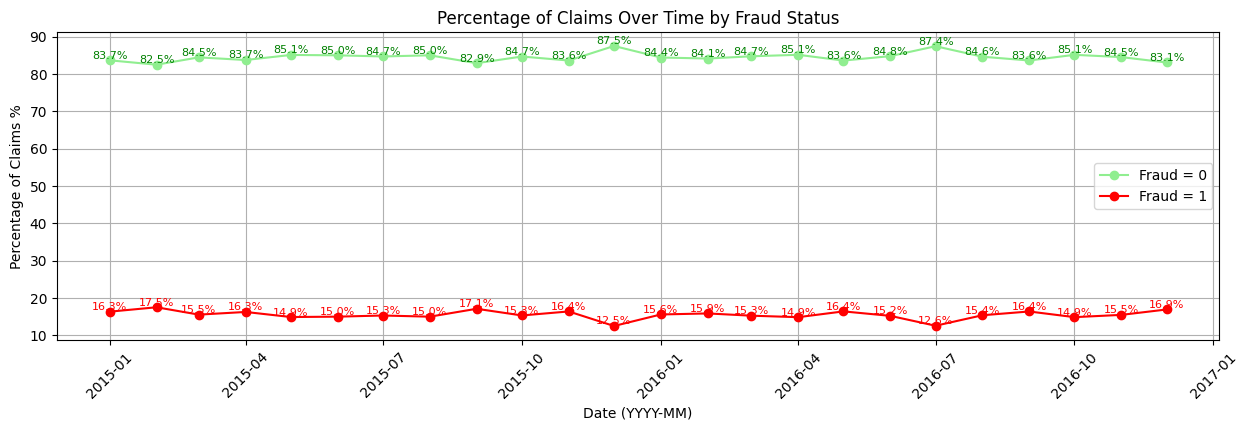

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by 'claim_year', 'claim_month', and 'fraud', then aggregate the count of 'claim_number'
grouped_df = df_dummies.groupby(['claim_year', 'claim_month', 'fraud']).agg({'claim_number': 'count'}).reset_index()
grouped_df['date'] = pd.to_datetime(grouped_df['claim_year'].astype(str) + '-' + grouped_df['claim_month'].astype(str))

# Pivoting the table to have fraud as columns
pivot_df = grouped_df.pivot_table(index='date', columns='fraud', values='claim_number', fill_value=0)
pivot_df.columns = ['claims_fraud_0', 'claims_fraud_1']

# Normalizing the data to get percentages
pivot_df['total'] = pivot_df['claims_fraud_0'] + pivot_df['claims_fraud_1']
pivot_df['claims_fraud_0_pct'] = pivot_df['claims_fraud_0'] / pivot_df['total'] * 100
pivot_df['claims_fraud_1_pct'] = pivot_df['claims_fraud_1'] / pivot_df['total'] * 100

# Plot the line graph
plt.figure(figsize=(15, 4))
plt.plot(pivot_df.index, pivot_df['claims_fraud_0_pct'], marker='o', label='Fraud = 0', color='lightgreen')
plt.plot(pivot_df.index, pivot_df['claims_fraud_1_pct'], marker='o', label='Fraud = 1', color='red')

# Writing a for loop to add data labels
for i, txt in enumerate(pivot_df['claims_fraud_0_pct']):
    plt.text(pivot_df.index[i], pivot_df['claims_fraud_0_pct'][i] + 0.5, f'{txt:.1f}%', ha='center', color='green', fontsize=8)

for i, txt in enumerate(pivot_df['claims_fraud_1_pct']):
    plt.text(pivot_df.index[i], pivot_df['claims_fraud_1_pct'][i] + 0.5, f'{txt:.1f}%', ha='center', color='red', fontsize=8)

plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage of Claims %')
plt.title('Percentage of Claims Over Time by Fraud Status')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.show()


**Key Observations**:

*   The majority of claims are non-fraudulent (Fraud = 0), consistently making up around 83% to 87% of the total claims.
*   There are minor fluctuations month-to-month in both fraudulent and non-fraudulent claims, but these fluctuations do not show a clear seasonal pattern.
*   For instance, in January 2015, fraudulent claims are around 16.3%, slightly increasing to 17.5% in February 2015, and then stabilizing around 15% to 17% in subsequent months.

**Potential Action Item**: We can probably investigate the reasons behind the increase in fraud claims in February 2015 and September 2015.

Examining the Distribution of Continuous Variables to check Skewness

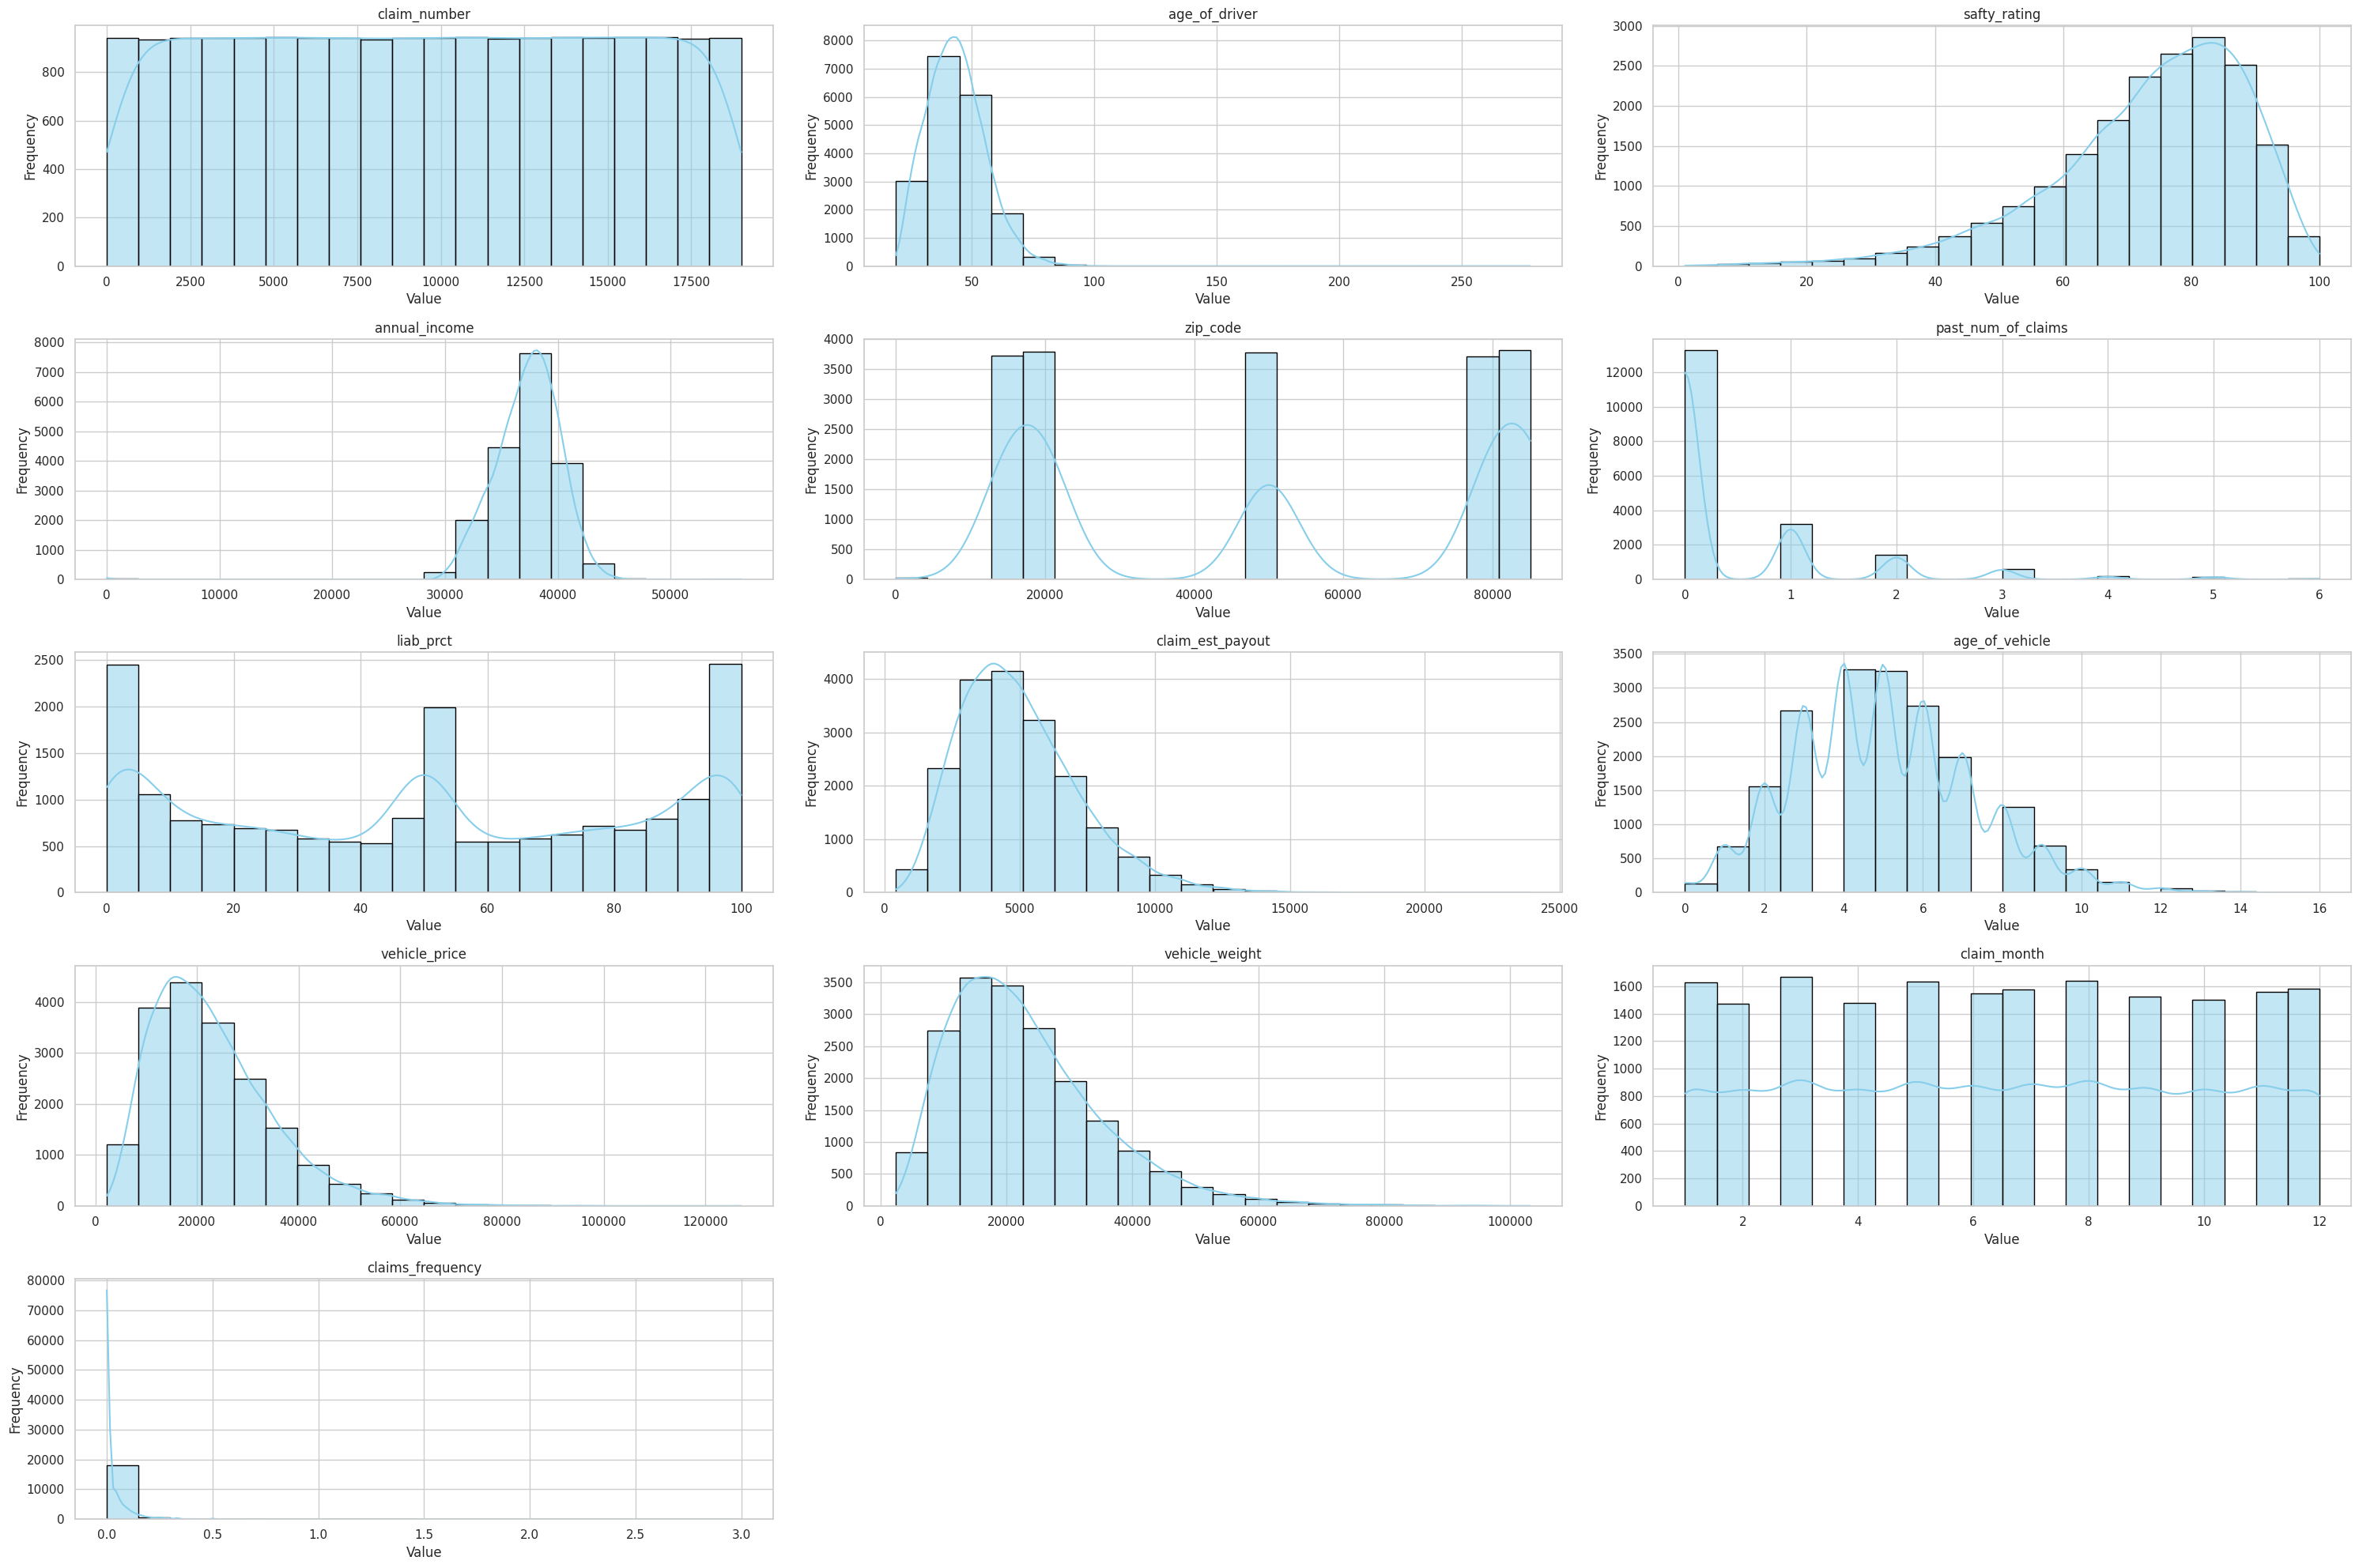

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style='whitegrid')

# Fisrt, we identify the columns or features that are continuous variables
continuous_cols = [col for col in df_dummies.columns if len(df_dummies[col].unique()) > 2]

# Plotting the histogram
fig, axes = plt.subplots(nrows=int(len(continuous_cols) / 3) + 1, ncols=3, figsize=(30, 20))
axes = axes.flatten()  # Flatten the array of axes

for i, col in enumerate(continuous_cols):
    sns.histplot(df_dummies[col], kde=True, color='skyblue', ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hiding the empty subplots if number of columns isn't a multiple of 3
for ax in axes[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


**Key Observations**:

* The visuals indicate that continuous variables such as "age_of_driver", "claim_est_payout", "vehicle_weight", and "vehicle_price" exhibit right skewness, whereas "safety_rating" is left-skewed.

* Consequently, transforming these variables would be necessary. However, the transformed variables resulted in lower F1 scores compared to their original forms, so the transformed data analysis has been omitted from this notebook.

#### Data Splitting to Train and Test

In [ ]:
# split the data
X = df_dummies.drop(['claim_number', 'fraud'],axis=1)
y = df_dummies['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Printing the shape of the data after splitting
print("Shape of X train:", X_train.shape, "| Shape of X test:", X_test.shape)
print("Shape of y train:", y_train.shape, "| Shape of y test:", y_test.shape)

Shape of X train: (15056, 33) | Shape of X test: (3765, 33)
Shape of y train: (15056,) | Shape of y test: (3765,)


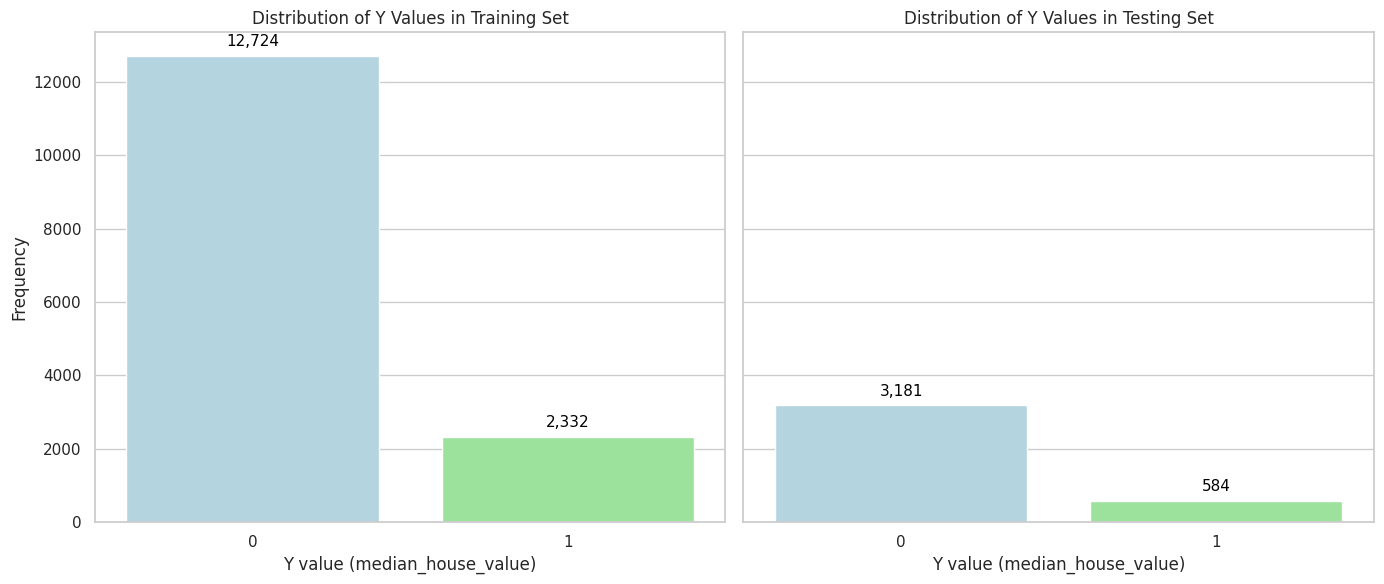

In [ ]:
# Creating the subplot for showcasing distribution of 1s and 0s for training and test dataset

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting for y_train
sns.countplot(x=y_train, ax=axes[0], palette=['lightblue', 'lightgreen'])
axes[0].set_title('Distribution of Y Values in Training Set')
axes[0].set_xlabel('Y value (median_house_value)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0', '1'])

# Adding data labels to y_train plot
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')

# Plotting for y_test
sns.countplot(x=y_test, ax=axes[1], palette=['lightblue', 'lightgreen'])
axes[1].set_title('Distribution of Y Values in Testing Set')
axes[1].set_xlabel('Y value (median_house_value)')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(['0', '1'])

# Adding data labels to y_test plot
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')
plt.tight_layout()
plt.show()

* The distribution of the Y values indicates that the data is imbalanced.
* Therefore, we will apply SMOTE to balance our X_train dataset.

In [ ]:
# Prior to SMOTE, we will perform Min-Max scaling

df_cols = X_train.columns # Extracting the unique columns of the dataset

# Initialize the scaler
scaler = MinMaxScaler()

# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assigning back the columns to X_train
X_train = pd.DataFrame(X_train)
X_train.columns = df_cols

# Assigning back the columns to X_test
X_test = pd.DataFrame(X_test)
X_test.columns = df_cols

In [ ]:
# Performing SMOTE with k_neighbors = 7
oversample = SMOTE(k_neighbors=7)

X_res, y_res = oversample.fit_resample(X_train, y_train)

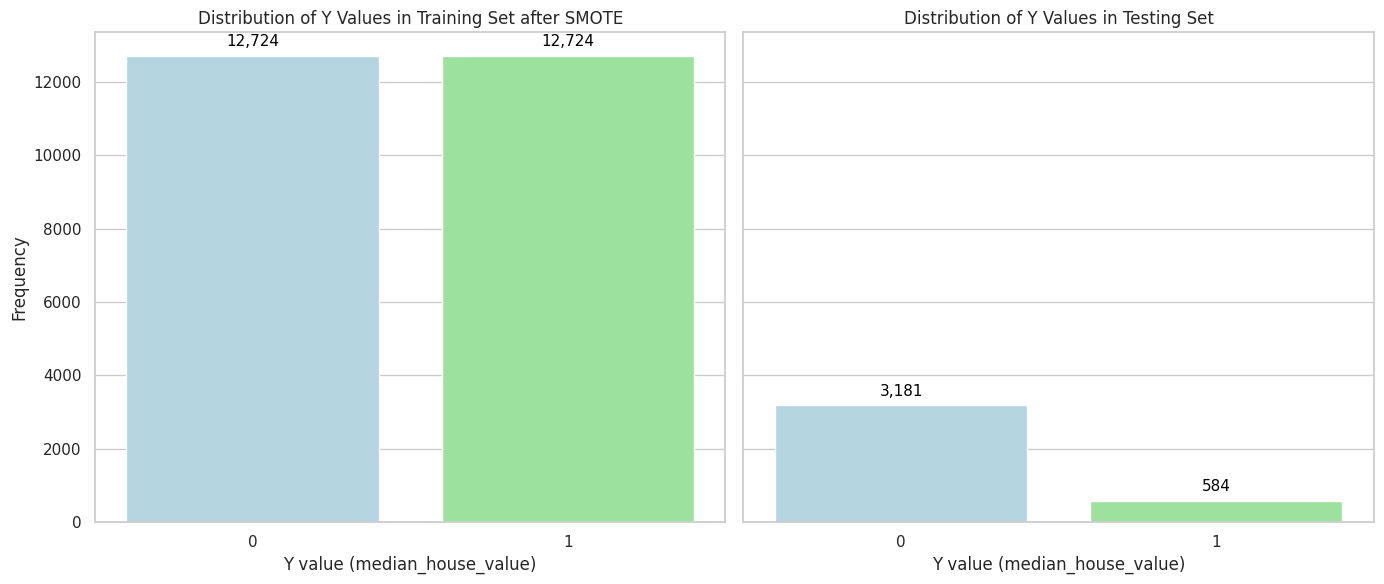

In [ ]:
# Creating the subplot for showcasing distribution of 1s and 0s for training and test dataset for SMOTE

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting for y_res
sns.countplot(x=y_res, ax=axes[0], palette=['lightblue', 'lightgreen'])
axes[0].set_title('Distribution of Y Values in Training Set after SMOTE')
axes[0].set_xlabel('Y value (median_house_value)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0', '1'])

# Adding data labels to y_train plot
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')

# Plotting for y_test
sns.countplot(x=y_test, ax=axes[1], palette=['lightblue', 'lightgreen'])
axes[1].set_title('Distribution of Y Values in Testing Set')
axes[1].set_xlabel('Y value (median_house_value)')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(['0', '1'])

# Adding data labels to y_test plot
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')
plt.tight_layout()
plt.show()

* After performing the SMOTE, the training dataset looks well balanaced with n = 12,724.

In [ ]:
y_res.shape

(25448,)

# 3. Modeling

#### Identifying Optimal Model and Thresholds for Maximum F1 Score Performance

First, we will apply basic models with default settings and use a loop to dynamically determine the optimal threshold for classifying the '1s'. The goal is to pinpoint which model delivers the highest F1 score performance.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, f1_score

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(min_samples_split=10),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "K-Neighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

# Prepare a list to store the results
results = []

# Loop through the models
for name, model in models.items():
    # Fit the model
    model.fit(X_res, y_res)

    # Get probability predictions for the test dataset
    probabilities = model.predict_proba(X_test)
    prob_pos = probabilities[:, 1]  # assuming the positive class is at index 1

    # Test various thresholds to find the best F1 score for class 1
    thresholds = np.linspace(0, 1, num=100)
    f1_scores = []
    for t in thresholds:
        # Apply threshold
        test_preds = (prob_pos >= t).astype(int)
        # Calculate F1 score for class 1
        f1 = f1_score(y_test, test_preds, pos_label=1)
        f1_scores.append(f1)

    # Find the threshold that maximized the F1 score
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_f1_score = max(f1_scores)

    # Use the best threshold to make final predictions
    test_preds = (prob_pos >= best_threshold).astype(int)

    # Calculate F1 scores
    train_preds = model.predict(X_res)  # Regular prediction for training
    train_report = classification_report(y_res, train_preds, output_dict=True)
    test_report = classification_report(y_test, test_preds, output_dict=True)

    # Extract F1 scores for classes 0, 1, and weighted average
    train_f1_score_0 = train_report['0']['f1-score']
    train_f1_score_1 = train_report['1']['f1-score']
    train_f1_score_weighted = train_report['weighted avg']['f1-score']
    test_f1_score_0 = test_report['0']['f1-score']
    test_f1_score_1 = test_report['1']['f1-score']
    test_f1_score_weighted = test_report['weighted avg']['f1-score']

    # Append the results to the list
    results.append({
        "Model": name,
        "Train F1 Score (0)": train_f1_score_0,
        "Train F1 Score (1)": train_f1_score_1,
        "Train F1 Score (Weighted)": train_f1_score_weighted,
        "Test F1 Score (0)": test_f1_score_0,
        "Test F1 Score (1)": test_f1_score_1,
        "Test F1 Score (Weighted)": test_f1_score_weighted,
        "Best Threshold": best_threshold,
        "Max Test F1 Score (1) at Best Threshold": best_f1_score
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,Train F1 Score (0),Train F1 Score (1),Train F1 Score (Weighted),Test F1 Score (0),Test F1 Score (1),Test F1 Score (Weighted),Best Threshold,Max Test F1 Score (1) at Best Threshold
0,Logistic Regression,0.633173,0.635758,0.634466,0.740063,0.358360,0.680856,0.484848,0.358360
1,Decision Tree,0.964010,0.963365,0.963688,0.000000,0.268567,0.041658,0.000000,0.268567
2,Random Forest,1.000000,1.000000,1.000000,0.790266,0.341034,0.720584,0.272727,0.341034
3,AdaBoost,0.862425,0.850537,0.856481,0.688168,0.326479,0.632065,0.494949,0.326479
4,Gradient Boosting,0.907653,0.888677,0.898165,0.741003,0.359022,0.681753,0.232323,0.359022
5,Extra Trees,1.000000,1.000000,1.000000,0.767670,0.317825,0.697893,0.252525,0.317825
6,K-Neighbors,0.833211,0.874432,0.853822,0.000000,0.268567,0.041658,0.000000,0.268567
7,GaussianNB,0.663802,0.695235,0.679518,0.725567,0.334698,0.664938,0.464646,0.334698


The above model results suggest that the **Gradient Boosting** model stands out as the best choice among the evaluated models for the following reasons, particularly when selecting a threshold of 0.29292:

* Based on the F1 scores for both classes (0 and 1), Gradient Boosting demonstrates a robust ability to balance both recall and precision across the dataset. F1 score for the positive class (1) at the best threshold (0.29292) is 0.358647, which is comparatively high among the models tested, indicating that it handles the minority class effectively.

* The weighted F1 score on the test set for Gradient Boosting is 0.758121, which is relatively high.

#### Optimizing Gradient Boosting Classifier with Grid Search

Next, we perform a comprehensive grid search to optimize the hyperparameters of a Gradient Boosting Classifier. The goal is to find the best combination of parameters that maximizes the F1 Score.



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report, f1_score
# import pandas as pd

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'learning_rate': [0.1, 0.2, 0.5],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10, 15]
# }

# # Initialize the classifier
# gb = GradientBoostingClassifier(random_state=42)

# # Setup the grid search
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)

# # Fit grid search to the data
# grid_search.fit(X_res, y_res)

# # Best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Retrieve the best model
# best_gb = grid_search.best_estimator_

# # Use the best threshold found previously
# best_threshold = 0.29292

# # Get probability predictions for the test dataset
# probabilities = best_gb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# # Apply the best threshold to get final predictions
# test_preds = (probabilities >= best_threshold).astype(int)

# # Recalculate classification report for updated model with the best threshold
# train_report = classification_report(y_res, train_preds)
# test_report = classification_report(y_test, test_preds)

# print(train_report)
# print(test_report)

Unfortunately, the outcomes from the grid search did not meet expectations (F1 Score of Test > Train).

Our Gradient Boosting models with default parameters and a customized threshold yielded the best results, and we will continue using the basic model:

In [ ]:
# Initializing the classifier with the best parameters as determined previously
gb_best = GradientBoostingClassifier(random_state=42)

# Fitting the model on the resampled training data
gb_best.fit(X_res, y_res)

# Getting probability predictions for the test dataset
probabilities = gb_best.predict_proba(X_test)[:, 1]

# Applying the best threshold found previously (0.29292) to make final predictions
best_threshold = 0.29292  # Best threshold from previous analysis
test_preds = (probabilities >= best_threshold).astype(int)

# Calculating and print the classification report for the final predictions
train_report = classification_report(y_res, train_preds)
test_report = classification_report(y_test, test_preds)

print(train_report)
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.63      0.66     12724
           1       0.66      0.73      0.70     12724

    accuracy                           0.68     25448
   macro avg       0.68      0.68      0.68     25448
weighted avg       0.68      0.68      0.68     25448

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3181
           1       0.29      0.45      0.35       584

    accuracy                           0.74      3765
   macro avg       0.59      0.62      0.59      3765
weighted avg       0.79      0.74      0.76      3765



Confusion Matrix of the model looks like the following:

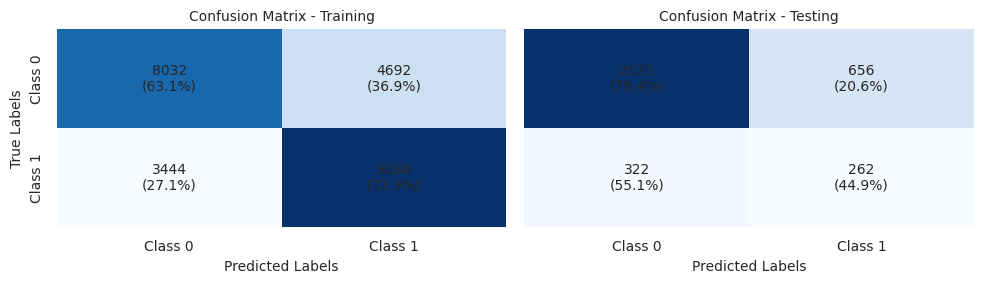

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculating confusion matrix
cm_train = confusion_matrix(y_res, train_preds)
cm_test = confusion_matrix(y_test, test_preds)

cm_train_percent = cm_train / cm_train.sum(axis=1, keepdims=True)
cm_test_percent = cm_test / cm_test.sum(axis=1, keepdims=True)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)

# To add the data labels, below function can be leveraged:
def annotate_heatmap(ax, data, data_percent):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            percentage = f'{data_percent[i, j]*100:.1f}%'
            text = f"{data[i, j]}\n({percentage})"
            ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=10)

# Confusion Matrix for Training Data
sns.heatmap(cm_train, annot=False, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix - Training', size = 10)
axes[0].set_xlabel('Predicted Labels', size = 10)
axes[0].set_ylabel('True Labels', size = 10)
axes[0].set_xticklabels(['Class 0', 'Class 1'], size = 10)
axes[0].set_yticklabels(['Class 0', 'Class 1'], size = 10)
annotate_heatmap(axes[0], cm_train, cm_train_percent)

# Confusion Matrix for Testing Data
sns.heatmap(cm_test, annot=False, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('Confusion Matrix - Testing', size = 10)
axes[1].set_xlabel('Predicted Labels', size = 10)
axes[1].set_xticklabels(['Class 0', 'Class 1'], size = 10)
axes[1].set_yticklabels(['Class 0', 'Class 1'], size = 10)
annotate_heatmap(axes[1], cm_test, cm_test_percent)

# Adjust layout
plt.tight_layout()
plt.show()

**Key Obseravtions**

1. The model demonstrates excellent capability in identifying non-fraudulent transactions, with a high accuracy rate of 77.9% for Class 0 (2479 true negatives out of 3181 total Class 0 predictions). This suggests that the model is able to classify the records to Non-Fraud records with high accuracy.

2. Despite the inherent challenges in detecting fraudulent activities, the model achieves a recall rate of 48.1% for Class 1. This performance is significant as it reflects the model's ability to correctly identify nearly half of all fraudulent transactions presented in the test set.

# Interpretability and Discussion

#### Permutation Importance

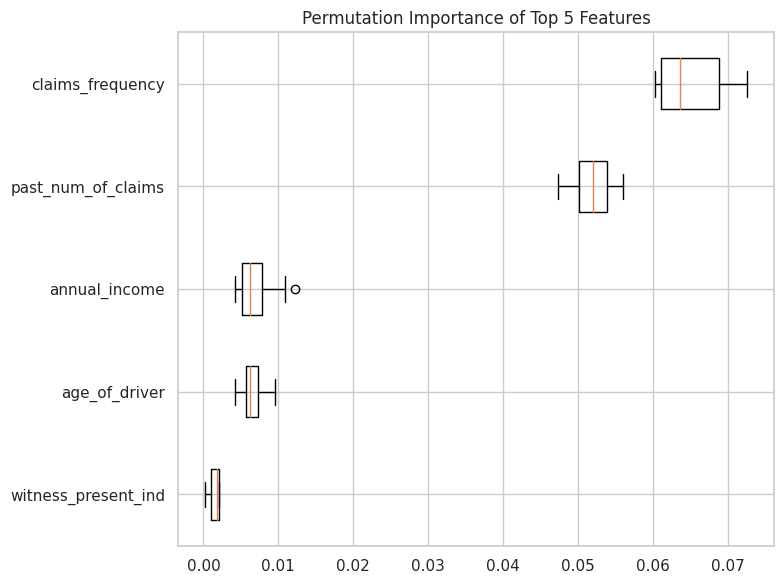


 Top 5 features based on permutation importance: ['witness_present_ind', 'age_of_driver', 'annual_income', 'past_num_of_claims', 'claims_frequency']


In [ ]:
from sklearn.inspection import permutation_importance

# Retrieving the best model from the completed grid search
clf = gb_best

# Permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Now, let's plot the permutation importance for the top 5 variables
top_5_features = X_test.columns[perm_sorted_idx][-5:].tolist()  # Store the top 5 features as a list
top_10_features = X_test.columns[perm_sorted_idx][-10:].tolist()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.boxplot(result.importances[perm_sorted_idx][-5:].T, vert=False,
            labels=top_5_features)
ax1.set_title('Permutation Importance of Top 5 Features')
fig.tight_layout()
plt.show()

# Print or store the top 5 features and 10 features (Just for reference)
print("\n Top 5 features based on permutation importance:", top_5_features)


The permutation importance plot indicates the following features are the most influential in predicting fraudulent claims:

1. **Claims Frequency**: This feature has the highest permutation importance, indicating that as the scaled claims frequency increases, the likelihood of fraud also increases.
2. **Past Number of Claims**: Similarly, an increase in the scaled number of past claims is strongly associated with a higher probability of fraudulent behavior.
3. **Annual Income**: Changes in the scaled annual income levels affect fraud risk, with higher income levels generally correlating with a lower risk of fraud.
4. **Age of Driver**: The directionality here shows that younger or older drivers (depending on the specific distribution) might have different fraud probabilities. Typically, younger drivers might have a higher risk.
5. **High Education Indicator**: Higher values in this scaled indicator generally suggest a lower probability of fraud, indicating that more educated policyholders might be less likely to commit fraud.

**Quick Notes**:

* Top 10 features based on permutation importance: 'accident_site_Local', 'address_change_ind', 'marital_status', 'claim_month', 'high_education_ind', 'witness_present_ind', 'age_of_driver', 'annual_income', 'past_num_of_claims', 'claims_frequency'

* We tried to rerun the model using only the top 10 and 5 features .However, the model's performance, as measured by the F1 score, reduced. Hence, we will continue using our original model configuration.


#### Partial Dependence Plot

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# to get rid of annoying future warnings...

!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

In [ ]:
# No of rows in the training dataset
print("No of rows in the training dataset:", X_res.shape[0])

# Top 5 records of the top 5 variables
print("\nTop 5 records of the top 5 important variables:")
X_res[top_5_features].head()

No of rows in the training dataset: 25448

Top 5 records of the top 5 important variables:


,witness_present_ind,age_of_driver,annual_income,past_num_of_claims,claims_frequency
0,1.0,0.208494,0.762279,0.333333,0.012121
1,1.0,0.073359,0.646030,0.000000,0.000000
2,1.0,0.084942,0.659873,0.000000,0.000000
3,0.0,0.030888,0.585632,0.000000,0.000000
4,0.0,0.096525,0.672471,0.000000,0.000000


In [ ]:
# Printing the unique values of the top 5 features
for i in top_5_features:
  print(i, ":" , X_res[i].nunique())

witness_present_ind : 1169
age_of_driver : 10150
annual_income : 12955
past_num_of_claims : 5480
claims_frequency : 6329


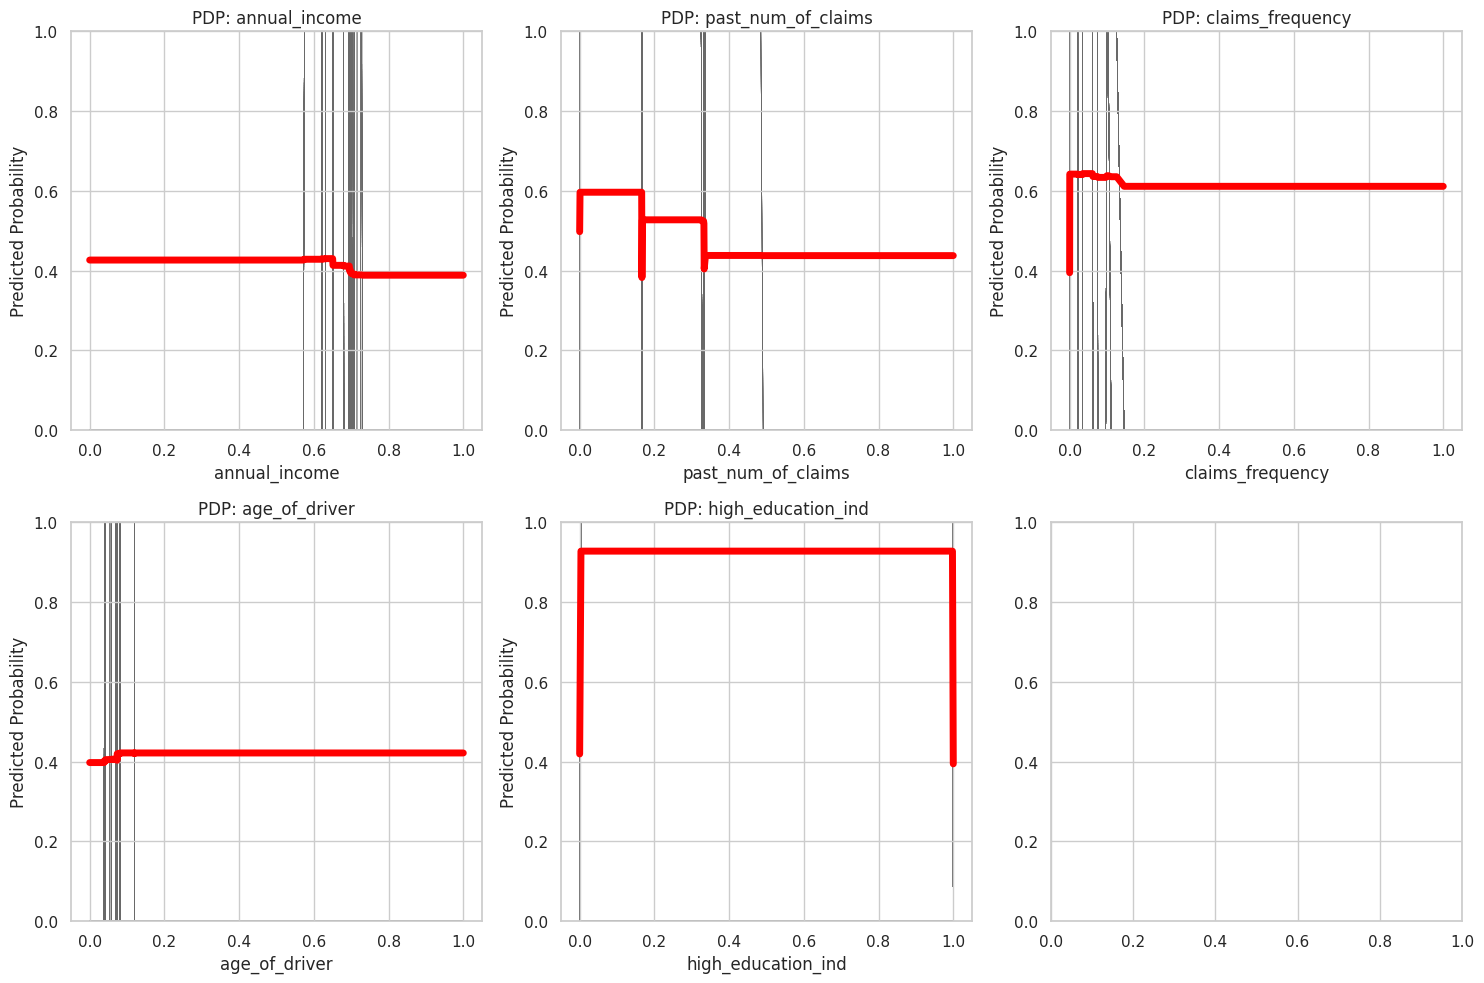

In [ ]:
# Creating a subplot grid of 3 rows x 2 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# List of features and their respective number of grid points
#These grid points were determined based on the system's limitations, as each of the PDP plots experienced crashes due to memory issues when higher numbers were initially attempted.

features = [
    ('annual_income', 400),
    ('past_num_of_claims', 1500),
    ('claims_frequency', 1000),
    ('age_of_driver', 750),
    ('high_education_ind', 3000)
]

# Initializing an empty list to collect all ICE dataframes
ice_dataframes = []

# ICE dataframes for each feature
for feature, num_points in features:
    tmp_df = ice(data=X_res, column=feature, predict=clf.predict, num_grid_points=num_points)
    ice_dataframes.append(tmp_df)

# Concatenating all ICE dataframes

all_ice_values = np.concatenate([df.values.flatten() for df in ice_dataframes])
y_min, y_max = np.min(all_ice_values), np.max(all_ice_values)

# PDP Plottimg
for idx, (feature, num_points) in enumerate(features):
    ice_plot(ice_dataframes[idx], ax=axes[idx], c='dimgray', linewidth=0.3, plot_pdp=True,
             pdp_kwargs={'linewidth': 5, 'color':'red'})
    axes[idx].set_title(f'PDP: {feature}')
    axes[idx].set_ylabel('Predicted Probability')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylim(y_min, y_max)  # Set consistent Y-axis limits

# Adjust subplot layout
plt.tight_layout()
plt.show()


* The PDPs provided further insights into the relationship between each feature and the predicted probability of fraud.

* It shows that the likelihood of fraud increases with higher claims frequency and a greater number of past claims, while it decreases with higher annual income and education levels. Additionally, younger drivers tend to have a higher risk of committing fraud.

#### Business Recommendations

1. **Enhanced Monitoring for Frequent Claimants**:
   * Implement stricter monitoring and verification processes for policyholders who exhibit a high frequency of claims to mitigate fraud risk effectively.
   * For instance, establish a threshold for the number of past claims that, when exceeded, triggers an automatic review or flagging of the account for potential fraudulent activity. This proactive approach ensures that high-risk cases are scrutinized more closely.

2. **Income-Based Risk Assessment**:
    * Incorporate scaled income data into your fraud detection models to identify high-risk income brackets.
    * Higher scaled income levels generally correlate with lower fraud risk, which can be used to tailor investigation processes.

3. **Age-Specific Fraud Prevention Strategies**:
   * Tailor fraud detection strategies to align with the age of drivers, leveraging data-driven insights.
   * Our analysis suggests that younger drivers are more likely to engage in fraudulent activities. Hence, it's advisable to implement targeted educational programs and warnings specifically designed for this demographic to mitigate such risks.

4. **Education Level Consideration**: Use the high education indicator to adjust risk profiles. Higher scaled values suggest a lower probability of fraud, providing valuable insights to enhance fraud detection accuracy.

In conclusion, these identified features should be monitored as Key Fraud Indicators (KFIs) within a dashboard or similar system, allowing Travelers to make informed decisions based on these insights.